In [40]:
cd C:\UB\Studies\Semester 2\Computer Vision\Project 1\CSE473-573-Project 1

C:\UB\Studies\Semester 2\Computer Vision\Project 1\CSE473-573-Project 1


In [194]:
def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product
def ncc(image,temp):
    import numpy as np
    t_np=np.array(temp)
    i_np=np.array(image)
    t_np=t_np/t_np.sum()
    i_l=len(image)
    i_b=len(image[0])
    t_l=len(temp)
    t_b=len(temp[0])
    ncc_mat=np.zeros((i_l-t_l+1,i_b-t_b+1)).tolist()
    for i in range(i_l-t_l+1):
        for j in range(i_b-t_b+1):
            ncc_mat[i][j]=correlation_coefficient(i_np[i:i+t_l,j:j+t_b],t_np)
    return(ncc_mat)
def arg_max(arr,c):
    m=[]
    (l,b)=arr.shape
    for i in range(l):
        for j in range(b):
            if arr[i][j]>=c:
                m+=[(i,j)]
    return(m)

def remove_duplicates(m):
    dedup=[]
    for i in m:
        p,q=i[0],i[1]
        if (p-1,q) in dedup or (p+1,q) in dedup or (p,q-1) in dedup or (p,q+1) in dedup or (p+1,q+1) in dedup or (p-1,q-1) in dedup or (p+1,q-1) in dedup or (p-1,q+1) in dedup:
            pass 
        else: 
            dedup+=([i])
    return(dedup)

gaussian=np.array([[1,2,1],[2,4,2],[1,2,1]])

def check(img,coords):
    import matplotlib.pyplot as plt
    from matplotlib.patches import Arrow, Circle
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for i in coords:
        ax.add_patch(Circle((i[1], i[0]), radius=1, color='red'))
    plt.show(fig) 

def thresholding(temp,c):
    threshold=copy.deepcopy(temp)
    for i in range(len(temp)):
        for j in range(len(temp[0])):
            if temp[i][j]>c:
                threshold[i][j]=255
            else:
                threshold[i][j]=0
    return(threshold)

def resize(temp,r):
    l=len(temp)
    b=len(temp[0])
    l_new=int(l*r)
    b_new=int(b*r)
#     resized = (cv2.resize(np.array(temp).astype('float32'), (b_new,l_new), interpolation=cv2.INTER_LINEAR).tolist())
    resized = (cv2.resize(np.array(temp).astype('float32'), (b_new,l_new)).tolist())
    return(resized)
        
def plot(img):
    plt.imshow(img, cmap="gray")
    plt.show()
        




In [12]:
import argparse
import copy
import os
import cv2
import numpy as np
import utils
from task1 import *
from matplotlib import pyplot as plt

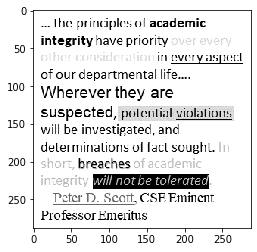

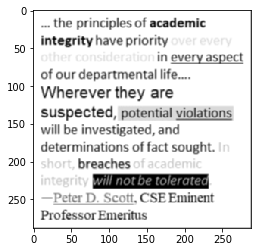

In [213]:
img=read_image('./data/proj1-task2-png.png')
plot(img)
img_gaussian=convolve2d(img,gaussian)
plot(img_gaussian)

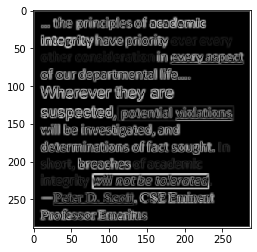

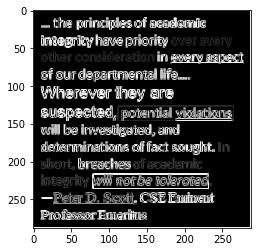

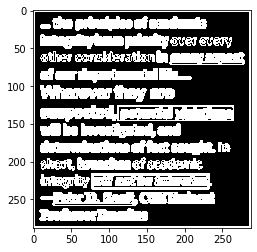

In [266]:
img_gauss_edges=edge_magnitude(detect_edges(img_gaussian,prewitt_x,False),detect_edges(img_gaussian,prewitt_y,False))
plot(img_gauss_edges)
img_edges=edge_magnitude(detect_edges(img,prewitt_x,False),detect_edges(img,prewitt_y,False))
plot(img_edges)
img_edges_threshold=thresholding(img_gauss_edges,10)
plot(img_edges_threshold)


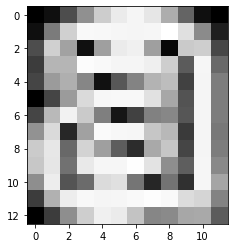

In [280]:
a=utils.crop(img_edges,104,117,155,167)
plot(a)

In [227]:
write_image(a,'./a_edge.jpg')

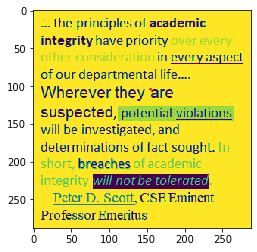

In [281]:
ncc_a=ncc(img_edges,a)
coords=arg_max(np.array(ncc_a),0.8)
check(img,coords)

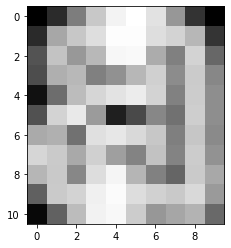

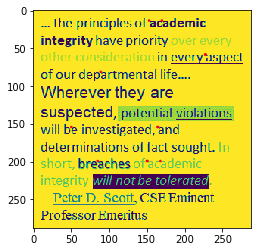

In [284]:
a_small=resize(a,0.9)
plot(a_small)
ncc_a=ncc(img_edges,a_small)
coords=arg_max(np.array(ncc_a),0.53)
check(img,coords)

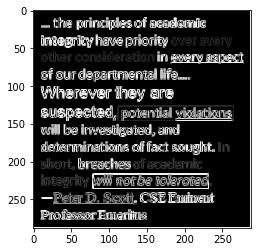

In [286]:
img_edges=edge_magnitude(detect_edges(img,prewitt_x,False),detect_edges(img,prewitt_y,False))
plot(img_edges)

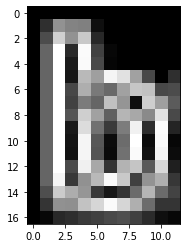

In [298]:
b=utils.crop(img_edges,194,211,58,70)
plot(b)
write_image(b,'./b_edge.jpg')

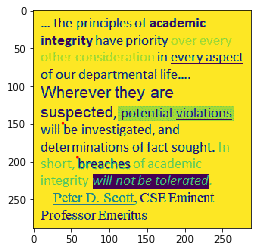

In [299]:
ncc_b=ncc(img_edges,b)
coords=arg_max(np.array(ncc_b),0.8)
check(img,coords)

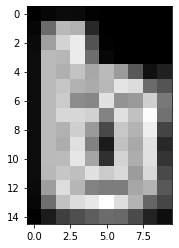

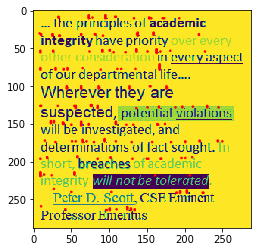

In [300]:
b_small=resize(b,0.9)
plot(b_small)
ncc_b=ncc(img_edges,b_small)
coords=arg_max(np.array(ncc_b),0.53)
check(img,coords)

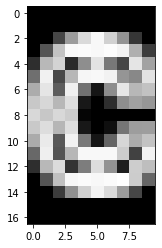

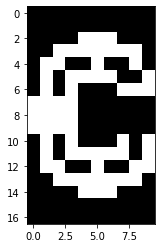

In [330]:
c=utils.crop(img_edges,128,145,66,76)
plot(c)
c_thresh=thresholding(c,170)
plot(c_thresh)
write_image(c,'./c_edge.jpg')

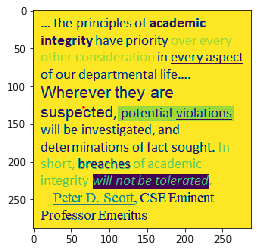

In [331]:
ncc_c=ncc(img_edges,c_thresh)
coords=arg_max(np.array(ncc_c),0.8)
check(img,coords)

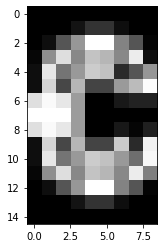

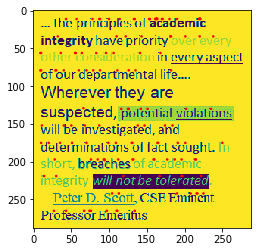

In [332]:
c_small=resize(c_thresh,0.9)
plot(c_small)
ncc_c=ncc(img_edges,c_small)
coords=arg_max(np.array(ncc_c),0.53)
check(img,coords)